Student ID: GX02138, AA23090

In [1]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, norm

# Introduction
- We have gathered different datasets of the year 2020 like World Happiness report, Health care, Crime, Cost of living and Quality of life from Kaggle and Numbeo:  

- https://www.kaggle.com/datasets/londeen/world-happiness-report-2020
- https://www.numbeo.com/health-care/rankings_by_country.jsp?title=2020-mid
- https://www.numbeo.com/crime/rankings_by_country.jsp
- https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2020-mid
- https://www.kaggle.com/datasets/dumbgeek/countries-dataset-2020?select=Quality+of+life+index+by+countries+2020.csv


- Our merged dataset contains all the factors that might affect a person's overall well-being and happiness.

- The datasets are cleaned and analyzed programmatically to get some value from it.

### Motive:
-  Trying to find the relation between different factors that effect a countries' people's overall happiness and well-being.

# Organizing the data: 
## Reading all the files:

In [2]:
whr = pd.read_csv("WHR20_DataForFigure2.1.csv")

hci = pd.read_csv("Health care index by countries 2020.csv")

crime_index = pd.read_csv("Crime index by countries 2020.csv")

col = pd.read_csv("Cost of living index by country 2020.csv")

qol = pd.read_csv("Quality of life index by countries 2020.csv")


In [3]:
whr.head(1)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.95433,71.900825,0.949172,-0.059482,0.195445,1.972317,1.28519,1.499526,0.961271,0.662317,0.15967,0.477857,2.762835


In [4]:
#Renaming the 'Country name' column, if needed, to make sure every dataset has the same column name, 
#so that merge can be performed later.

whr.rename({'Country name': 'Country'}, axis = 1, inplace = True)
whr.head(2)

,Country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741


- This 'World Happiness report' dataset has multiple columns describing "how much" of the score is "explained by what factor".
- We just want the different factors' data for our analysis and not the explanation of the score, so we get rid of them.
- We also get rid of the Standard error, upper and lower whisker columns for exactly the same reason.

In [5]:
cont_ds = whr[['Country', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 
               'Healthy life expectancy', 'Freedom to make life choices','Generosity', 'Perceptions of corruption']]

cont_ds.head()

,Country,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218


- There are also many columns in some other datasets which we don't require for our analysis. So, we get rid of them.

In [6]:
hci.head(2)

,Country,Health Care Index,Health Care Exp. Index
0,Denmark,80.00,147.47
1,Norway,74.36,135.67


In [7]:
health_care_index = hci[['Country', 'Health Care Index']]
health_care_index.head(5)

,Country,Health Care Index
0,Denmark,80.00
1,Norway,74.36
2,Switzerland,72.44
3,Sweden,69.23
4,Finland,75.79


In [8]:
#Before
col.head(2)

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Switzerland,122.40,50.25,87.89,120.27,123.01,119.53
1,Norway,101.43,36.15,70.21,91.14,109.28,88.38


In [9]:
#After
cost_of_living = col[['Country', 'Cost of Living Index']]
cost_of_living.head()

,Country,Cost of Living Index
0,Switzerland,122.40
1,Norway,101.43
2,Iceland,100.48
3,Japan,83.35
4,Denmark,83.00


In [10]:
#Before
qol.head(2)

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,Australia,186.21,107.31,58.64,77.38,73.54,7.52,34.73,23.46,92.70
1,Hong Kong,99.05,65.32,79.30,66.08,77.22,47.46,41.46,67.69,83.64


- We can observe here that Quality of Life dataset already has all the factors we need for our analysis, but the reason we're using all the other datasets is because the QOL dataset has limited data and individually, each dataset has more data regarding their respective factors. This way we can eliminate as many Null values as possible.  

In [11]:
print("If required columns are used from QOL dataset:")
print("No.of Null values in Healthcare index column: ", qol['Health Care Index'].isna().sum())
print("No.of Null values in Cost of Living Index column: ", qol['Cost of Living Index'].isna().sum())
print("No.of Null values in Safety Index column: ", qol['Safety Index'].isna().sum())

If required columns are used from QOL dataset:
No.of Null values in Healthcare index column:  61
No.of Null values in Cost of Living Index column:  61
No.of Null values in Safety Index column:  61


In [12]:
print("After using respective individual datasets: ")
print("No.of Null values in Healthcare index column: ", health_care_index['Health Care Index'].isna().sum())
print("No.of Null values in Cost of Living Index column: ", cost_of_living['Cost of Living Index'].isna().sum())
print("No.of Null values in Safety Index column: ", crime_index['Safety Index'].isna().sum())


After using respective individual datasets: 
No.of Null values in Healthcare index column:  10
No.of Null values in Cost of Living Index column:  0
No.of Null values in Safety Index column:  0


In [13]:
#After
quality_of_life = qol[['Country', 'Quality of Life Index', 'Pollution Index']]
quality_of_life.head()

,Country,Quality of Life Index,Pollution Index
0,Australia,186.21,23.46
1,Hong Kong,99.05,67.69
2,Czech Republic,156.24,40.23
3,Switzerland,192.01,22.39
4,Macao,180.91,28.46


## Merging all the datasets:

In [14]:
df = cont_ds.merge(health_care_index, on = 'Country', how ='left').merge(
    crime_index, on = 'Country', how ='left').merge(
    cost_of_living, on = 'Country', how ='left').merge(
    quality_of_life, on = 'Country', how ='left')

df.head()

,Country,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Health Care Index,Crime Index,Safety Index,Cost of Living Index,Quality of Life Index,Pollution Index
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,75.79,23.32,76.68,70.29,190.22,11.55
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,80.00,25.10,74.90,83.00,192.67,21.33
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,72.44,21.60,78.40,122.40,192.01,22.39
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,65.92,23.36,76.64,100.48,181.75,16.21
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,74.36,35.43,64.57,101.43,175.19,20.35


# EDA: Cleaning, Exploring, Analyzing the Data

Cleaning:
- Removed columns from different datasets as they are irrelevant for our project
- Solved problem of 'no same column' during merging of all the datasets

Limited data and Null values resolution:
- Quality of life dataset has limited data, so we gathered more countries' data from other relevant datasets to eliminate as many Null values as possible in the above code.

In [15]:
#Number of rows and columns in the merged dataset
df.shape

(153, 15)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 152
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       153 non-null    object 
 1   Regional indicator            153 non-null    object 
 2   Ladder score                  153 non-null    float64
 3   Logged GDP per capita         153 non-null    float64
 4   Social support                153 non-null    float64
 5   Healthy life expectancy       153 non-null    float64
 6   Freedom to make life choices  153 non-null    float64
 7   Generosity                    153 non-null    float64
 8   Perceptions of corruption     153 non-null    float64
 9   Health Care Index             126 non-null    float64
 10  Crime Index                   110 non-null    float64
 11  Safety Index                  110 non-null    float64
 12  Cost of Living Index          111 non-null    float64
 13  Quali

In [17]:
#To get an overview of the data
df.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Health Care Index,Crime Index,Safety Index,Cost of Living Index,Quality of Life Index,Pollution Index
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,126.000000,110.000000,110.000000,111.000000,113.000000,113.000000
mean,5.47324,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,60.345516,43.838636,56.161364,48.519369,123.381062,57.421858
std,1.11227,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,10.838618,14.479915,14.479915,18.713451,33.767187,19.898337
min,2.56690,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,38.050000,15.700000,15.510000,21.980000,55.650000,11.550000
25%,4.72410,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,53.075000,32.235000,46.860000,34.695000,97.840000,40.560000
50%,5.51500,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,59.975000,43.845000,56.155000,42.870000,115.950000,62.790000
75%,6.22850,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,68.445000,53.140000,67.765000,57.875000,152.530000,72.480000
max,7.80870,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,81.970000,84.490000,84.300000,122.400000,192.670000,88.370000


In [18]:
#To make sure no country is repeated
df.Country.unique()

array(['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Norway',
       'Netherlands', 'Sweden', 'New Zealand', 'Austria', 'Luxembourg',
       'Canada', 'Australia', 'United Kingdom', 'Israel', 'Costa Rica',
       'Ireland', 'Germany', 'United States', 'Czech Republic', 'Belgium',
       'United Arab Emirates', 'Malta', 'France', 'Mexico',
       'Taiwan Province of China', 'Uruguay', 'Saudi Arabia', 'Spain',
       'Guatemala', 'Italy', 'Singapore', 'Brazil', 'Slovenia',
       'El Salvador', 'Kosovo', 'Panama', 'Slovakia', 'Uzbekistan',
       'Chile', 'Bahrain', 'Lithuania', 'Trinidad and Tobago', 'Poland',
       'Colombia', 'Cyprus', 'Nicaragua', 'Romania', 'Kuwait',
       'Mauritius', 'Kazakhstan', 'Estonia', 'Philippines', 'Hungary',
       'Thailand', 'Argentina', 'Honduras', 'Latvia', 'Ecuador',
       'Portugal', 'Jamaica', 'South Korea', 'Japan', 'Peru', 'Serbia',
       'Bolivia', 'Pakistan', 'Paraguay', 'Dominican Republic',
       'Bosnia and Herzegovina', 'Moldova', '

In [19]:
#To know how many countries belong to which region
df['Regional indicator'].value_counts()

Sub-Saharan Africa                    39
Western Europe                        21
Latin America and Caribbean           21
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

### Sanity Checks:

- The Ladder score, Healthy life expentency, crime Index, cost of living index, quality of life index and pollution index cannot be zero or negative

In [20]:
print('Number of zero or negative values in Ladder Score:', len(df.loc[df['Ladder score']<=0,:]))
print('Number of zero or negative values in Healthy life expentency:', len(df.loc[df['Healthy life expectancy']<=0,:]))
print('Number of zero or negative values in crime index:', len(df.loc[df['Crime Index']<=0,:]))
print('Number of zero or negative values in cost of living index:', len(df.loc[df['Cost of Living Index']<=0,:]))
print('Number of zero or negative values in quality of life index:', len(df.loc[df['Quality of Life Index']<=0,:]))
print('Number of zero or negative values in pollution index:', len(df.loc[df['Pollution Index']<=0,:]))

Number of zero or negative values in Ladder Score: 0
Number of zero or negative values in Healthy life expentency: 0
Number of zero or negative values in crime index: 0
Number of zero or negative values in cost of living index: 0
Number of zero or negative values in quality of life index: 0
Number of zero or negative values in pollution index: 0


- The social support, freedom to make life choices and perceptions to corruption columns should have values between 0 and 1, as the values in them are the average of a binary question asked to multiple people with '0' being 'No' and '1' being 'Yes'.

In [21]:
df['Social support'].describe()

count    153.000000
mean       0.808721
std        0.121453
min        0.319460
25%        0.737217
50%        0.829204
75%        0.906747
max        0.974670
Name: Social support, dtype: float64

In [22]:
df['Freedom to make life choices'].describe()

count    153.000000
mean       0.783360
std        0.117786
min        0.396573
25%        0.714839
50%        0.799805
75%        0.877709
max        0.974998
Name: Freedom to make life choices, dtype: float64

In [23]:
df['Perceptions of corruption'].describe()

count    153.000000
mean       0.733120
std        0.175172
min        0.109784
25%        0.683019
50%        0.783122
75%        0.849151
max        0.935585
Name: Perceptions of corruption, dtype: float64

# Data Visualization

In [24]:
df1 = df.groupby(['Regional indicator']).mean()
df2 = df.groupby(['Regional indicator']).mean()
df11 = df1[['Ladder score', 'Logged GDP per capita']]
df111 = df1[['Ladder score','Healthy life expectancy', 'Health Care Index', 'Crime Index', 'Cost of Living Index',
             'Pollution Index']]

- Which region is more wealthy and happy overall?

<AxesSubplot:title={'center':'Region wise health and ladder score'}, ylabel='Regional indicator'>

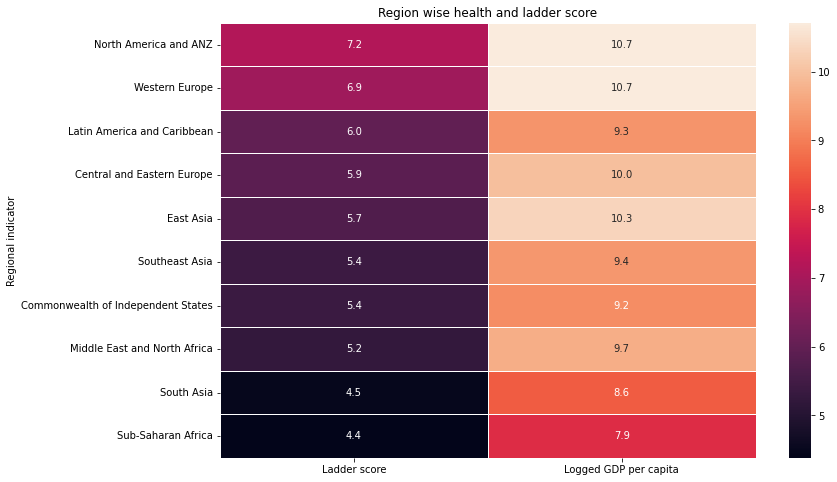

In [25]:
plt.figure(figsize=(12,8))
plt.title("Region wise health and ladder score")
sns.heatmap(df11.sort_values(by='Ladder score', ascending=False), annot=True, fmt='.1f', linewidth=.5)

We see that there is clear relation between the ladder score and logged GDP per capita, as regions where ladder score is low, the GDP per capitas are also low.

- Each regions overview of different indices. 

<AxesSubplot:title={'center':'Region wise overview of different indices'}, ylabel='Regional indicator'>

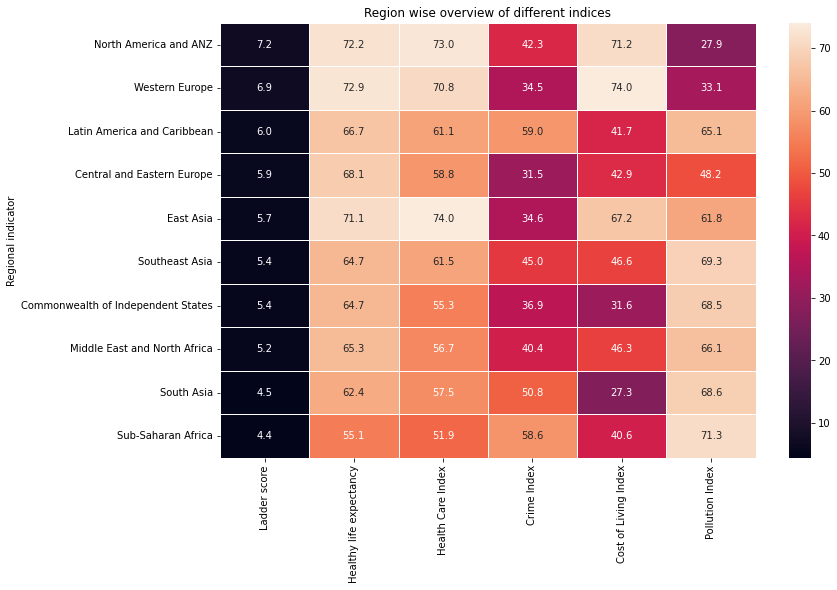

In [26]:
plt.figure(figsize=(12,8))
plt.title("Region wise overview of different indices")
sns.heatmap(df111.sort_values(by='Ladder score', ascending=False), annot=True, fmt='.1f', linewidth=.5)

 We observe that in regions where the health care index is high, the healthy life expectancy is high and the overall happiness index is high, but no proper relation can be seen that factors like crime index, cost of living and pollution index affect the happiness index.

- Different regions' Quality of Life

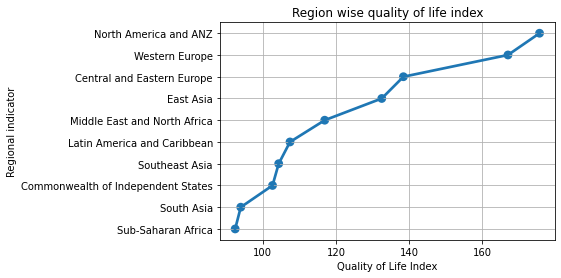

In [27]:
df1 = df1.reset_index().sort_values(by='Ladder score', ascending=False)
plt.title("Region wise quality of life index")
sns.pointplot(data=df1.sort_values(by='Quality of Life Index', ascending=False), x='Quality of Life Index',
              y='Regional indicator')
plt.grid()

We see that the quality of life is lowest in the Sub-Saharan Africa region and highest in North America and ANZ region

- Does pollution affect Healthy life expentancy?

<AxesSubplot:title={'center':'Pollution index vs Healthy life expectancy'}, xlabel='Pollution Index', ylabel='Healthy life expectancy'>

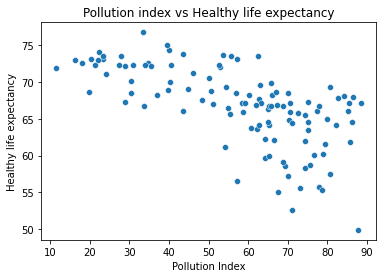

In [28]:
plt.title("Pollution index vs Healthy life expectancy")
sns.scatterplot(data=df, x= 'Pollution Index', y='Healthy life expectancy')

We can observe here that mostly where pollution index is lower, there is higher life expectancy and with higher pollution index, life expectancy is lower.

- Do countries which have higher GDP per capita have a better health care index or no?

<AxesSubplot:title={'center':'Logged GDP per capita vs Health Care Index'}, xlabel='Logged GDP per capita', ylabel='Health Care Index'>

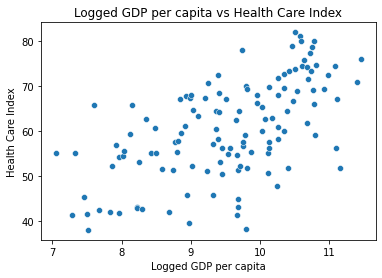

In [29]:
plt.title("Logged GDP per capita vs Health Care Index")
sns.scatterplot(data=df.sort_values(by='Logged GDP per capita'), x='Logged GDP per capita', y='Health Care Index')

There is no concrete relation between GDP per capita and health care index.

- Does crime affect Quality of life?

Text(0.5, 1.0, 'Crime Index vs Quality of Life Index')

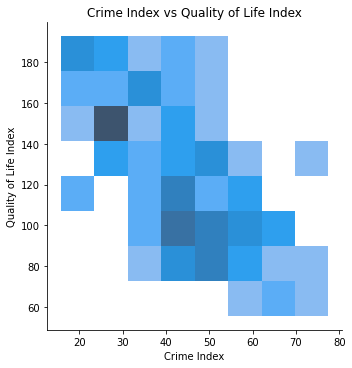

In [30]:

sns.displot(data=df, x='Crime Index', y='Quality of Life Index')
plt.title("Crime Index vs Quality of Life Index")

Even here we do not observe a strong relation between crime index and quality of life.

- Does Logged GDP per capita and People's perceptions of corruption in their countries have any relation?

Text(0.5, 1.0, 'Logged GDP per capita vs Perceptions of corruption')

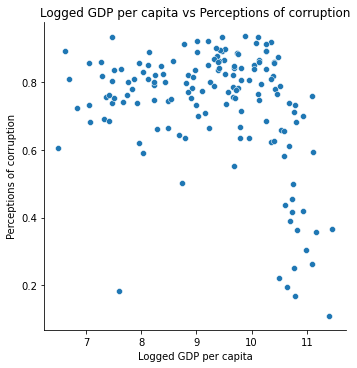

In [31]:

sns.relplot(data=df, y='Perceptions of corruption', x='Logged GDP per capita')
plt.title("Logged GDP per capita vs Perceptions of corruption")

Generally, every country's people have some degree of perception of corruption in their country, but we can observe that the highest GDP per capita countries have it less compared to others.

- Does Social Support affect Ladder Score?

<AxesSubplot:title={'center':'Ladder score vs Social support'}, xlabel='Ladder score', ylabel='Social support'>

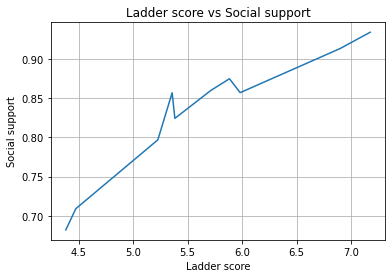

In [32]:
df2.pivot(columns=['Ladder score'])
plt.title("Ladder score vs Social support")
plt.grid()
sns.lineplot(data=df2, y='Social support', x='Ladder score')

There is a significant linear relation between social support and ladder score here, with the highest ladder score having the highest social support.

In [33]:
c = pd.read_csv("csvData.csv", usecols = ['Country', 'crimeIndex'])
df = df.merge(c, on='Country')
df = df.dropna()


# Is there a difference in the crime index of 2020 and 2021?

Null Hypothesis - There is no difference between crime index of 2020 and 2021

In [34]:
df = df.rename(columns={'Crime Index':'crimeindex2020', 'crimeIndex':'crimeindex2021'})
df

,Country,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Health Care Index,crimeindex2020,Safety Index,Cost of Living Index,Quality of Life Index,Pollution Index,crimeindex2021
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,75.79,23.32,76.68,70.29,190.22,11.55,27.59
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,80.00,25.10,74.90,83.00,192.67,21.33,26.22
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,72.44,21.60,78.40,122.40,192.01,22.39,21.62
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,65.92,23.36,76.64,100.48,181.75,16.21,23.75
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,74.36,35.43,64.57,101.43,175.19,20.35,33.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Egypt,Middle East and North Africa,4.1514,9.316542,0.735448,61.780151,0.708354,-0.196878,0.787727,45.84,46.92,53.08,29.54,86.54,85.65,46.83
109,India,South Asia,3.5733,8.849824,0.592201,60.215187,0.881445,0.057552,0.772043,67.13,43.32,56.68,24.58,108.63,78.87,44.43
111,Tanzania,Sub-Saharan Africa,3.4762,7.967665,0.688933,57.496075,0.821540,0.109669,0.619799,54.29,58.95,41.05,35.25,96.45,80.78,56.00
113,Zimbabwe,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,52.34,57.47,42.53,55.30,75.18,73.19,59.30


In [35]:
ttest_ind(df['crimeindex2020'], df['crimeindex2021'])

Ttest_indResult(statistic=-0.3990002470104738, pvalue=0.6903230166801531)

Since the pvalue is greater than 0.05, we can accept the null hypothesis and we can conclude that is there is no concrete difference between those two columns.

### What we learned:

- Through this project we learnt how to scan a dataset to understand the relevance of data in various columns. 
- We understood how we can correlate two different datasets based on common data fields and merge the dataset. We then worked on performing data cleaning and sanity checks. As most of our data is numerical, we had to perform various types of sanity checks. 
- We analyzed our data to find possible relations between different columns and performed visualizations to observe the relations and patterns. 
- From this project, we learnt that there are several assumptions about certain factors affecting the happiness of an overall country or region, but not all factors affect the happiness index or quality of life. We additionally learnt to perform a t-test.

### Summary:

- Through this analysis, we could find the relation between various factors affecting the happiness index in different countries region wise. 
- We see that there is a clear indication that the regions having a higher GDP i.e countries having healthy economies have higher happiness index. We also observe that in regions where the health care index is high, the healthy life expectancy is high and the overall happiness index is high. 
- Although, no concrete evidence can be seen that factors like crime index, cost of living and pollution index affects the happiness index. Another major observation is that - happiness index is high in the regions where quality of life is high.